### A/B Testing For Product Landing Page ###

The purpose of this script is to conduct analysis on an A/B test for a product landing page. Version A received the default page while version B was treated to the new version of the landing page. Using test data, we can assess which landing page was more effective at converting users, and also conduct exploratory analysis to better understand user traffic.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
df = pd.read_csv("data/ab_test_data.csv")
df.head()

,user_id,variant,view_timestamp,converted,device_type,location,traffic_source
0,1,A,2025-05-14 16:35:05.916627,0,mobile,US,organic
1,2,B,2025-05-19 16:35:05.916652,0,desktop,US,paid
2,3,A,2025-05-20 16:35:05.916655,0,mobile,Canada,referral
3,4,A,2025-05-19 16:35:05.916658,0,mobile,Germany,email
4,5,A,2025-04-26 16:35:05.916661,0,mobile,Canada,referral


### Exploratory Data Analysis ###

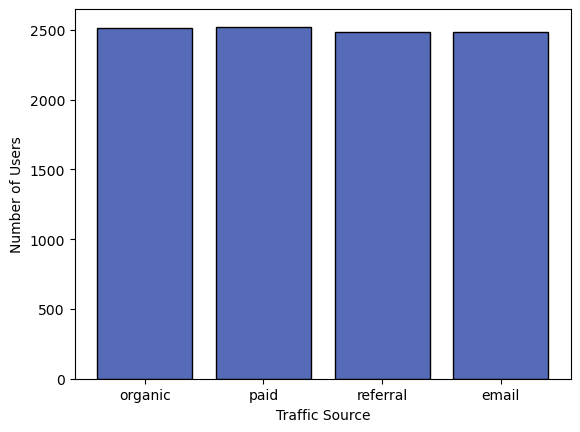

In [ ]:
sb.histplot(data=df, x="traffic_source", shrink=0.8, color="#1e399f")
plt.xlabel("Traffic Source")
plt.ylabel("Number of Transactions")
plt.savefig("visuals/traffic_source_histogram.png", dpi=300, bbox_inches='tight')
plt.show()

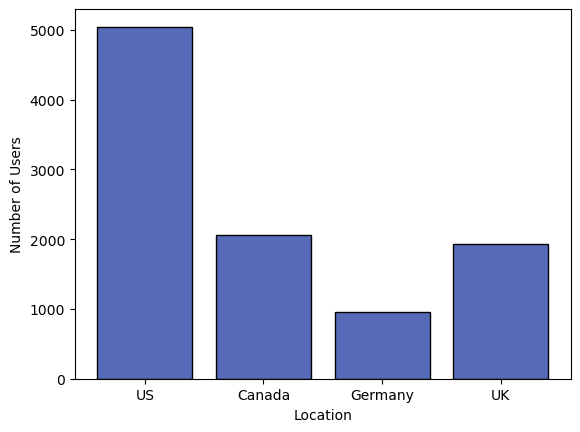

In [ ]:
sb.histplot(data=df, x="location", shrink=0.8, color="#1e399f")
plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.savefig("visuals/location_histogram.png", dpi=300, bbox_inches='tight')
plt.show()

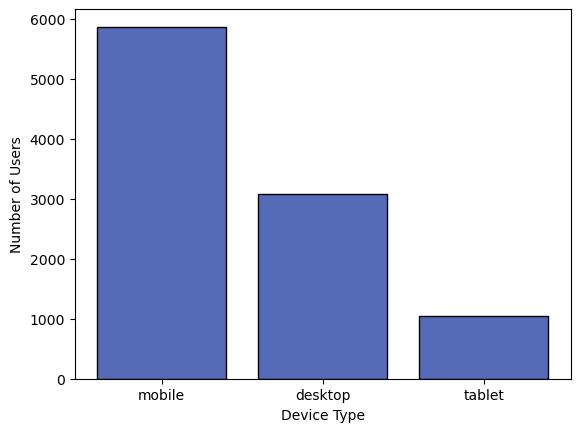

In [ ]:
sb.histplot(data=df, x="device_type", shrink=0.8, color="#1e399f")
plt.xlabel("Device Type")
plt.ylabel("Number of Users")
plt.savefig("visuals/device_type_histogram.png", dpi=300, bbox_inches='tight')
plt.show()

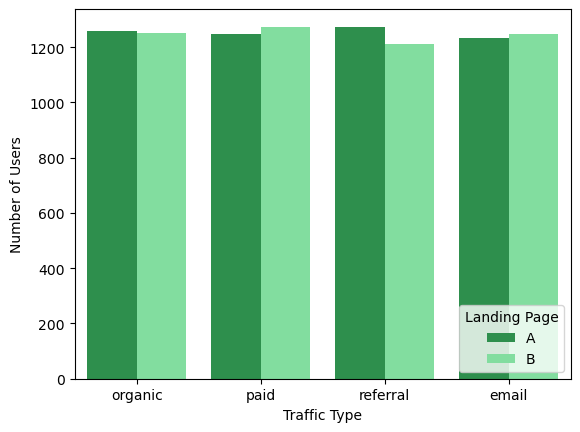

In [ ]:
myplot = sb.countplot(data=df, x="traffic_source", hue="variant", palette={"A":"#1e9f47", "B":"#73ec99"})
myplot.legend(title="Landing Page", loc="lower right")
plt.xlabel("Traffic Type")
plt.ylabel("Number of Users")
plt.savefig("visuals/traffic_source_by_page.png", dpi=300, bbox_inches='tight')
plt.show()

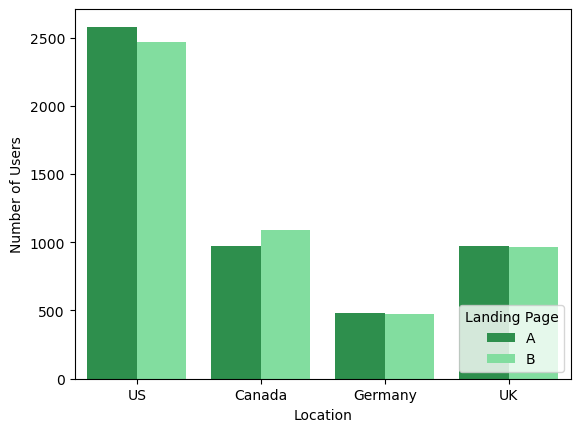

In [ ]:
myplot = sb.countplot(data=df, x="location", hue="variant", palette={"A":"#1e9f47", "B":"#73ec99"})
myplot.legend(title="Landing Page", loc="lower right")
plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.savefig("visuals/location_by_page.png", dpi=300, bbox_inches='tight')
plt.show()

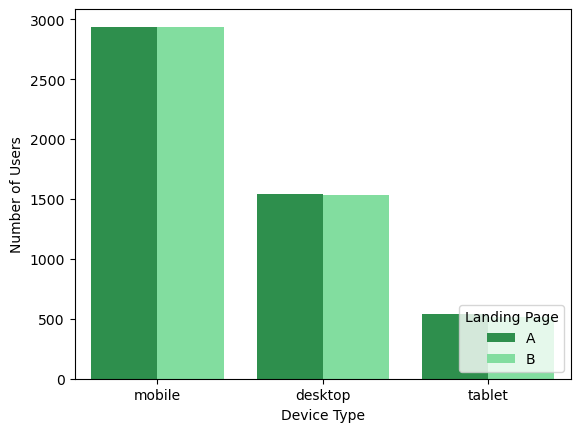

In [ ]:
myplot = sb.countplot(data=df, x="device_type", hue="variant", palette={"A":"#1e9f47", "B":"#73ec99"})
myplot.legend(title="Landing Page", loc="lower right")
plt.xlabel("Device Type")
plt.ylabel("Number of Users")
plt.savefig("visuals/device_type_by_page.png", dpi=300, bbox_inches='tight')
plt.show()

Another way for double checking if there are any differences in platform type or location for users of each test:

In [36]:
# no differences for device type between landing page type
pd.crosstab(df['variant'], df['device_type'], normalize='index')

device_type,desktop,mobile,tablet
variant,,,
A,0.307999,0.584879,0.107121
B,0.307800,0.589132,0.103068


In [37]:
# no differences for device type between landing page type
pd.crosstab(df['variant'], df['location'], normalize='index')

location,Canada,Germany,UK,US
variant,,,,
A,0.194694,0.096549,0.194295,0.514462
B,0.218568,0.094446,0.192902,0.494085


There are almost no differences between landing page tests A and B across location and device type. This means that whatever differences we see for the convertion rate when we compare Landing Page A and B will likely be due to the pages themselves and not due to any other factors. If there were significant imbalances between the landing pages for location and device type we would need to control for those when testing for significance.

### Which Landing Page Was More Effective? ###
Which landing page (A or B) was best at converting users?

In [ ]:
# Landing Page A: 10% 
# Landing Page B: 12%

df.groupby('variant')['converted'].mean()

variant
A    0.099541
B    0.119110
Name: converted, dtype: float64

At first glance, Landing Page B seems to be slightly more effective at generating paid users (12% compared to 10%). However, is this difference actually statistically significant? 

In [5]:
pd.crosstab(df['variant'], df['device_type'], normalize='index')

device_type,desktop,mobile,tablet
variant,,,
A,0.307999,0.584879,0.107121
B,0.307800,0.589132,0.103068


In [6]:
# running a z-test for proportions

pg_summary = df.groupby('variant')['converted'].agg(['sum', 'count'])
pg_conv = pg_summary['sum'].values  # number of conversions
n_obs = pg_summary['count'].values  # total users in each group

In [12]:
z_stat, p_val = proportions_ztest(pg_conv, n_obs)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Z-statistic: -3.1358
P-value: 0.0017


The difference in conversion rates between Landing Page A and B is statistically significant. This means that going forward, we should fully roll out Landing Page B to generate more user transactions. 

### Additional Analysis ###
Now that we know Landing Page B is the most effective version, I want to further look into if the conversion rates differ according to location or device type. This could lead to some deeper insights.

In [16]:
df_b = df[df['variant'] == 'B']
df_b.groupby('device_type')['converted'].mean() # some differences but they are very minimal
df_b.groupby('location')['converted'].mean() # some differences but they are very minimal

location
Canada     0.121101
Germany    0.129512
UK         0.117464
US         0.116883
Name: converted, dtype: float64

### Conclusion ###

An A/B test was conducted to check which version of the landing page, A or B, generated the most conversions. Page B had a higher conversion rate than Page A, and a z-proportions test confirms that this difference is statistically significant. There were no differences between A or B across device type or user location, indicating that the results are strong and driven only by differences between the landing pages. The recommendation is to fully roll out Landing Page B as the standard landing page.

### Follow-Up Investigation ###

This analysis has also shown that most users are based in the United States, and access the landing page on mobile phones. Future research and investigation can considering targeting marketing campaigns towards increasing interest of Canadian users. 